# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Загрузка и подготовка данных

In [2]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
for i in df0, df1, df2:
    head = i.head()
    print(head)
    print()
    
    info = i.info()
    print(info)
    print()
    
    describe = i.describe()
    print(describe)
    print()
    
    print('------------------------------------------------------------------------------------------------------------------')

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580  

In [4]:
# Функция пробегает по признакам датафрейма и если тип у признака float64 оценивается распределени
def unique(data):
    for column in data.columns:
        if data[column].dtype == 'float64':
            print(column)
            fig = px.histogram(data, x = column, marginal = 'box', title = ''+ column)
            fig.show()

Когда формирую данные функции юпитер отказывается сохранять проект. Пришлось закомментировать.

In [5]:
#unique(df0)

---

In [6]:
#unique(df1)

---

In [7]:
#unique(df2)

---

#### Вывод

Данные были загружены и подготовлены для дальнейшей работы. Предобработки не требуют.

# 2. Обучение и проверка модели

Целевой признак это **product**.
Признаки для обудения модели: **f0, f1, f2**.

Разделим данные на 2 выборки:
- 75% обучающую
- 25% валидационную

----

## df0

In [8]:
target_df0 = df1['product']
features_df0 = df1.drop(['product','id'],axis=1)

In [9]:
# Разделение на обучающую и валидационную выборки
features_train_df0, features_valid_df0, target_train_df0, target_valid_df0 = train_test_split(features_df0, 
                                                                              target_df0,
                                                                              test_size=0.25, 
                                                                              random_state=12345)

In [10]:
# Обучем модель
model_df0 = LinearRegression()
model_df0.fit(features_train_df0,target_train_df0)
predict_df0 = model_df0.predict(features_valid_df0)

In [11]:
#Расчёт среднего запаса предсказанного сырья и RMSE модели
MEAN_df0 = predict_df0.mean()
RMSE_df0 = mean_squared_error(target_valid_df0, predict_df0)**0.5

print('Cредний запас предсказанного сырья',MEAN_df0)
print('RMSE модели',RMSE_df0)

Cредний запас предсказанного сырья 68.728546895446
RMSE модели 0.893099286775616


In [41]:
predict_df0

array([ 82.66331365,  54.43178616,  29.74875995, ..., 137.87934053,
        83.76196568,  53.95846638])

---

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f789e271a90>,
      dtype=object)

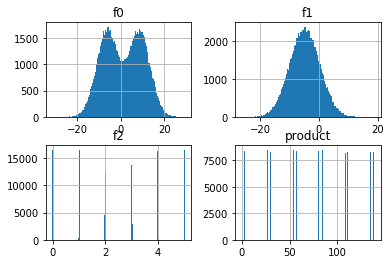

In [12]:
df1.hist(bins=150)

## df1

In [13]:
target_df1 = df1['product']
features_df1 = df1.drop(['product','id'],axis=1)

In [14]:
# Разделение на обучающую и валидационную выборки
features_train_df1, features_valid_df1, target_train_df1, target_valid_df1 = train_test_split(features_df1, 
                                                                              target_df1,
                                                                              test_size=0.25, 
                                                                              random_state=12345)

In [15]:
# Обучем модель
model_df1 = LinearRegression()
model_df1.fit(features_train_df1, target_train_df1)
predict_df1 = model_df1.predict(features_valid_df1)

In [16]:
#Расчёт среднего запаса предсказанного сырья и RMSE модели
MEAN_df1 = predict_df1.mean()
RMSE_df1 = mean_squared_error(target_valid_df1, predict_df1)**0.5

print('Cредний запас предсказанного сырья',MEAN_df1)
print('RMSE модели',RMSE_df1)

Cредний запас предсказанного сырья 68.728546895446
RMSE модели 0.893099286775616


----

## df2

In [17]:
target_df2 = df2['product']
features_df2 = df2.drop(['product','id'],axis=1)

In [18]:
# Разделение на обучающую и валидационную выборки
features_train_df2, features_valid_df2, target_train_df2, target_valid_df2 = train_test_split(features_df2, 
                                                                              target_df2,
                                                                              test_size=0.25, 
                                                                              random_state=12345)

In [19]:
# Обучем модель
model_df2 = LinearRegression()
model_df2.fit(features_train_df2, target_train_df2)
predict_df2 = model_df2.predict(features_valid_df2)

In [20]:
#Расчёт среднего запаса предсказанного сырья и RMSE модели
MEAN_df2 = predict_df2.mean()
RMSE_df2 = mean_squared_error(target_valid_df2, predict_df2)**0.5

print('Cредний запас предсказанного сырья',MEAN_df2)
print('RMSE модели',RMSE_df2)

Cредний запас предсказанного сырья 94.96504596800489
RMSE модели 40.02970873393434


#### Вывод

Самые большие средние запасы сырья находятся в регионе **df2**, значение rmse самое высокое. Большое значение rmse региона говорит о большом разбросе ошибок.

# 3. Подготовка к расчёту прибыли

 Значения для расчётов сохраним в отдельных переменных.

**all_field** - Общее кол-во месторождений для исследования (500)

**budget** - Бюджет на разработку скважин в регионе — (10 000 000 000)

**budget_of_one** - бюджет одного месторождения месторождений (10 000 000 000/200 = 50 000 000) 

**barrel_income** - Доход бареля нефти (450)

**income_from_each_unit** -Доход с каждой единицы продукта (450 000)

**minimum_probability_losses** - Минимальная вероятность убытков (0.025)

In [21]:
all_field = 500
budget = 10000000000
budget_of_one = 50000000 
barrel_income = 450
income_from_each_unit = 450000
minimum_probability_losses = 0.025

In [22]:
print('Объём сырья для безубыточной разработки новой скважины',budget_of_one/income_from_each_unit)

Объём сырья для безубыточной разработки новой скважины 111.11111111111111


In [23]:
print('Средний объём сырья в регионе df0:',(predict_df0.mean() * income_from_each_unit)-budget_of_one)
print('Средний объём сырья в регионе df1:',(predict_df1.mean() * income_from_each_unit)-budget_of_one)
print('Средний объём сырья в регионе df2:',(predict_df2.mean() * income_from_each_unit)-budget_of_one)

Средний объём сырья в регионе df0: -19072153.8970493
Средний объём сырья в регионе df1: -19072153.8970493
Средний объём сырья в регионе df2: -7265729.314397804


#### Вывод

* Объём безубыточной разработки новой скважины равен 111 тыс.
* Если смотреть средний объём сырья все регионы убыточны. 

# 4. Расчёт прибыли и рисков 

In [24]:
#Напишите функцию revenue(), которая подсчитывает доход. Она получает на вход:

#список ответов (target) — объёма запасов в новых скважинах;
#список вероятностей (probabilities) — модель оценивает объёма запасов в новых скважинах;
#лучшие скважины для разработки (count).

#def revenue(target, probabilities, count):
#    probs_sorted = probabilities.sort_values(ascending=False).head(count)
#    selected = (target[probs_sorted.index][:count]*income_from_each_unit).sum()
#    return selected

In [25]:
def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False).head(count)
    selected = (target[probs_sorted.index][:count]*income_from_each_unit).sum() 
    return selected - budget

Напишем функцию для расчета дохода:
- сначала она сортирует 200 значений
- далее умножаем на цену бареля(450000) и суммируем

---

Бутстреп для каждого региона по очереди: Вычислим средний доход по регионам и 95% доверительный интервал и риск убытков:

In [26]:
state = np.random.RandomState(12345) 

target_valid_df0 = target_valid_df0.reset_index(drop=True)

values = []
for i in range(1000):
    target_subsample = target_valid_df0.sample(n=500, replace=True, random_state=state)
    probs_subsample =  pd.Series(predict_df0)[target_subsample.index] 
    values.append(revenue(target_subsample,probs_subsample,200))
      
values_df0 = pd.Series(values)
lower_df0 = values_df0.quantile(0.025)
upper_df0 = values_df0.quantile(0.975)
mean_df0 = values_df0.mean()
print("Средний доход для скважин региона df0:", mean_df0)
print("5%-квантиль:", lower_df0)
print("95%-квантиль:", upper_df0)
print("Риск оценки не окупаемости для региона df2: {:.2%}".format((values_df0 < 0).mean()))

Средний доход для скважин региона df0: 515222773.4432912
5%-квантиль: 68873225.37050366
95%-квантиль: 931547591.2570513
Риск оценки не окупаемости для региона df2: 1.00%


#### df0
Средняя прибыль с региона df0 состовляет 425938526 рублей. С вероятностью в 95% доход может быть не менее -102090094 рублей.

Риск оценки не окупаемости для региона 6%

---

In [27]:
target_valid_df1 = target_valid_df1.reset_index(drop=True)

values1 = []

for i in range(1000):
    target_subsample = target_valid_df1.sample(n=500, replace=True, random_state=state)
    probs_subsample =  pd.Series(predict_df1)[target_subsample.index] 
    values1.append(revenue(target_subsample,probs_subsample,200))

values_df1 = pd.Series(values1)
lower_df1 = values_df1.quantile(0.025)
upper_df1 = values_df1.quantile(0.975)
mean_df1 = values_df1.mean()
print("Средний доход для скважин региона df1:", mean_df1)
print("5%-квантиль:", lower_df1)
print("95%-квантиль:", upper_df1)
print("Риск оценки не окупаемости для региона df2: {:.2%}".format((values_df1 < 0).mean()))

Средний доход для скважин региона df1: 518259493.6973262
5%-квантиль: 128123231.4330864
95%-квантиль: 953612982.0669086
Риск оценки не окупаемости для региона df2: 0.30%


#### df1
Средняя прибыль с региона df0 состовляет 518259493 рублей. С вероятностью в 95% доход может быть не менее 128123231 рублей.

Риск оценки не окупаемости для региона 0.30%

---

In [28]:
target_valid_df2 = target_valid_df2.reset_index(drop=True)
state = np.random.RandomState(12345) 
values2 = []
for i in range(1000):
    target_subsample = target_valid_df2.sample(n=500, replace=True, random_state=state)
    probs_subsample =  pd.Series(predict_df2)[target_subsample.index] 
    values2.append(revenue(target_subsample,probs_subsample,200))
    
values_df2 = pd.Series(values2)
lower_df2 = values_df2.quantile(0.025)
upper_df2 = values_df2.quantile(0.975)
mean_df2 = values_df2.mean()
print("Средний доход для скважин региона df2:", mean_df2)
print("5%-квантиль:", lower_df2)
print("95%-квантиль:", upper_df2)
print("Риск оценки не окупаемости для региона df2: {:.2%}".format((values_df2 < 0).mean()))

Средний доход для скважин региона df2: 435008362.7827556
5%-квантиль: -128880547.32978901
95%-квантиль: 969706954.1802661
Риск оценки не окупаемости для региона df2: 6.40%


#### df2
Средний доход для региона df2 состовляет  420194005 рублей. С вероятностью в 95% доход может быть не менее -115852609 рублей.

Риск оценки не окупаемости для региона 6.20%

---

Если смотреть значения по среденему, то все районы окупаются. Однако с вероятностью в 95% полностью окупается регион **df1**,у данного региона риск оценки не окупаемост 0%.

Оценим плотность убыточности наших регионов в процентах:

Для этого создадим таблицу с доходностью из списка из бутстрепа, потом отсортируем те, которые приносят менее 10 млрд рублей. Затем вычитаем их кол-во из общего кол-ва и делим на общее и выражаем в процентах.

Район **df1** показал самый маленький процент убыточных скважин 0.30%, с вероятностью в 95% полностью окупается. Предлогаю данный регион для разработки скважин.

#### Вывод


В данном проекте было 3 датасета с данными о трех регионах с месторождениями нефти. Провели предварительный анализ исходных данных, затем разделили датасет на 2 выборки, обучающую и вариационную 75 и 25 %. затем обучили модель линейной регрессии на обучающих данных и сделали предсказания на валидных. Далее вычислили для каждого региона средний доход и 95% доверительный интервал. В результате выяснили, что самый высокий средний доход у региона df1. На последнем этапе посчитали процент убыточности каждого региона, df1 является неимением убыточным, процент убыточных скважин 0.30, при условии задачи не более 2.5%. В итоге выбираем для разработки регион df1.